In [7]:
%matplotlib inline

In [22]:
import xarray as xr
import pandas as pd
import os,glob

import astropy.constants as c
import astropy.units as u
import matplotlib.pyplot as plt

import pyathena as pa

In [28]:
from pyathena import preprocessing
from pyathena.yt_analysis import yt_analysis
from pyathena.set_plt import labels,label_units,units,unit
reload(preprocessing)
reload(yt_analysis)

<module 'pyathena.yt_analysis.yt_analysis' from '/tigress/changgoo/pyathena-TIGRESS/pyathena/yt_analysis/yt_analysis.pyc'>

In [24]:
dirs=glob.glob('{}/*R*_metal*/zprof'.format(base))

In [25]:
ids=[]
for dd in dirs:
    ids.append(dd.split('/')[-2])
ids.append('MHD_4pc_new')
ids.append('MHD_8pc_new')
ids

['R4_2pc_metal',
 'R16_16pc_metal',
 'R8_8pc_metal_hydro',
 'R2_1pc_metal',
 'LGR8_8pc_metal',
 'LGR2_2pc_metal',
 'LGR4_4pc_metal',
 'R8_8pc_metal',
 'R8_8pc_metal2',
 'R2_2pc_metal',
 'R4_4pc_metal',
 'R2_4pc_metal',
 'R8_4pc_metal',
 'R16_8pc_metal',
 'MHD_4pc_new',
 'MHD_8pc_new']

In [26]:
#ids=['LGR4_4pc_metal']

preparing metadata for R4_2pc_metal...
Reading a history file:/tigress/changgoo/R4_2pc_metal/hst/R4_2pc_metal.hst.p
/tigress/changgoo/R4_2pc_metal/hst/R4_2pc_metal.hst_cal.p is created
Reading a history file:/tigress/changgoo/R4_2pc_metal/hst/R4_2pc_metal.sn.p
new /tigress/changgoo/R4_2pc_metal/hst/R4_2pc_metal.hst_zp.p is created
preparing metadata for R16_16pc_metal...
Reading a history file:/tigress/changgoo/R16_16pc_metal/hst/R16_16pc_metal.hst.p
/tigress/changgoo/R16_16pc_metal/hst/R16_16pc_metal.hst_cal.p is created
Reading a history file:/tigress/changgoo/R16_16pc_metal/hst/R16_16pc_metal.sn.p
new /tigress/changgoo/R16_16pc_metal/hst/R16_16pc_metal.hst_zp.p is created
preparing metadata for R8_8pc_metal_hydro...
Reading a history file:/tigress/changgoo/R8_8pc_metal_hydro/hst/R8_8pc_metal_hydro.hst.p
/tigress/changgoo/R8_8pc_metal_hydro/hst/R8_8pc_metal_hydro.hst_cal.p is created
Reading a history file:/tigress/changgoo/R8_8pc_metal_hydro/hst/R8_8pc_metal_hydro.sn.p
new /tigress/

IndexError: list index out of range

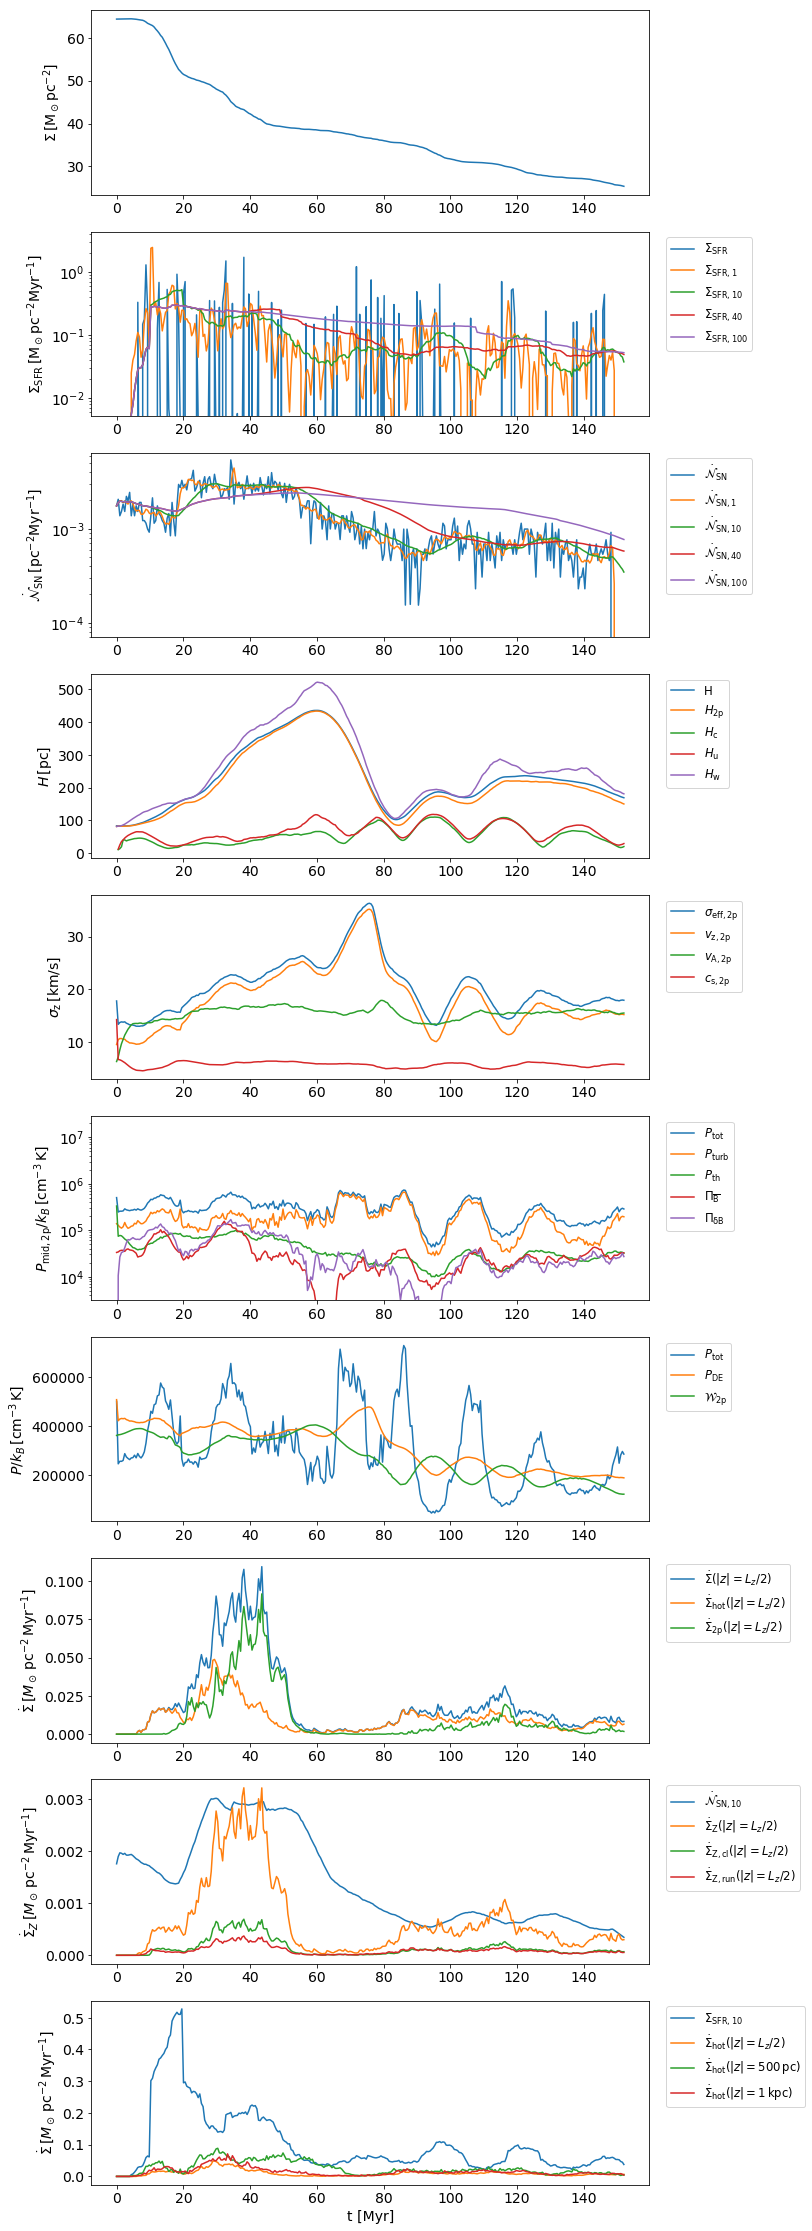

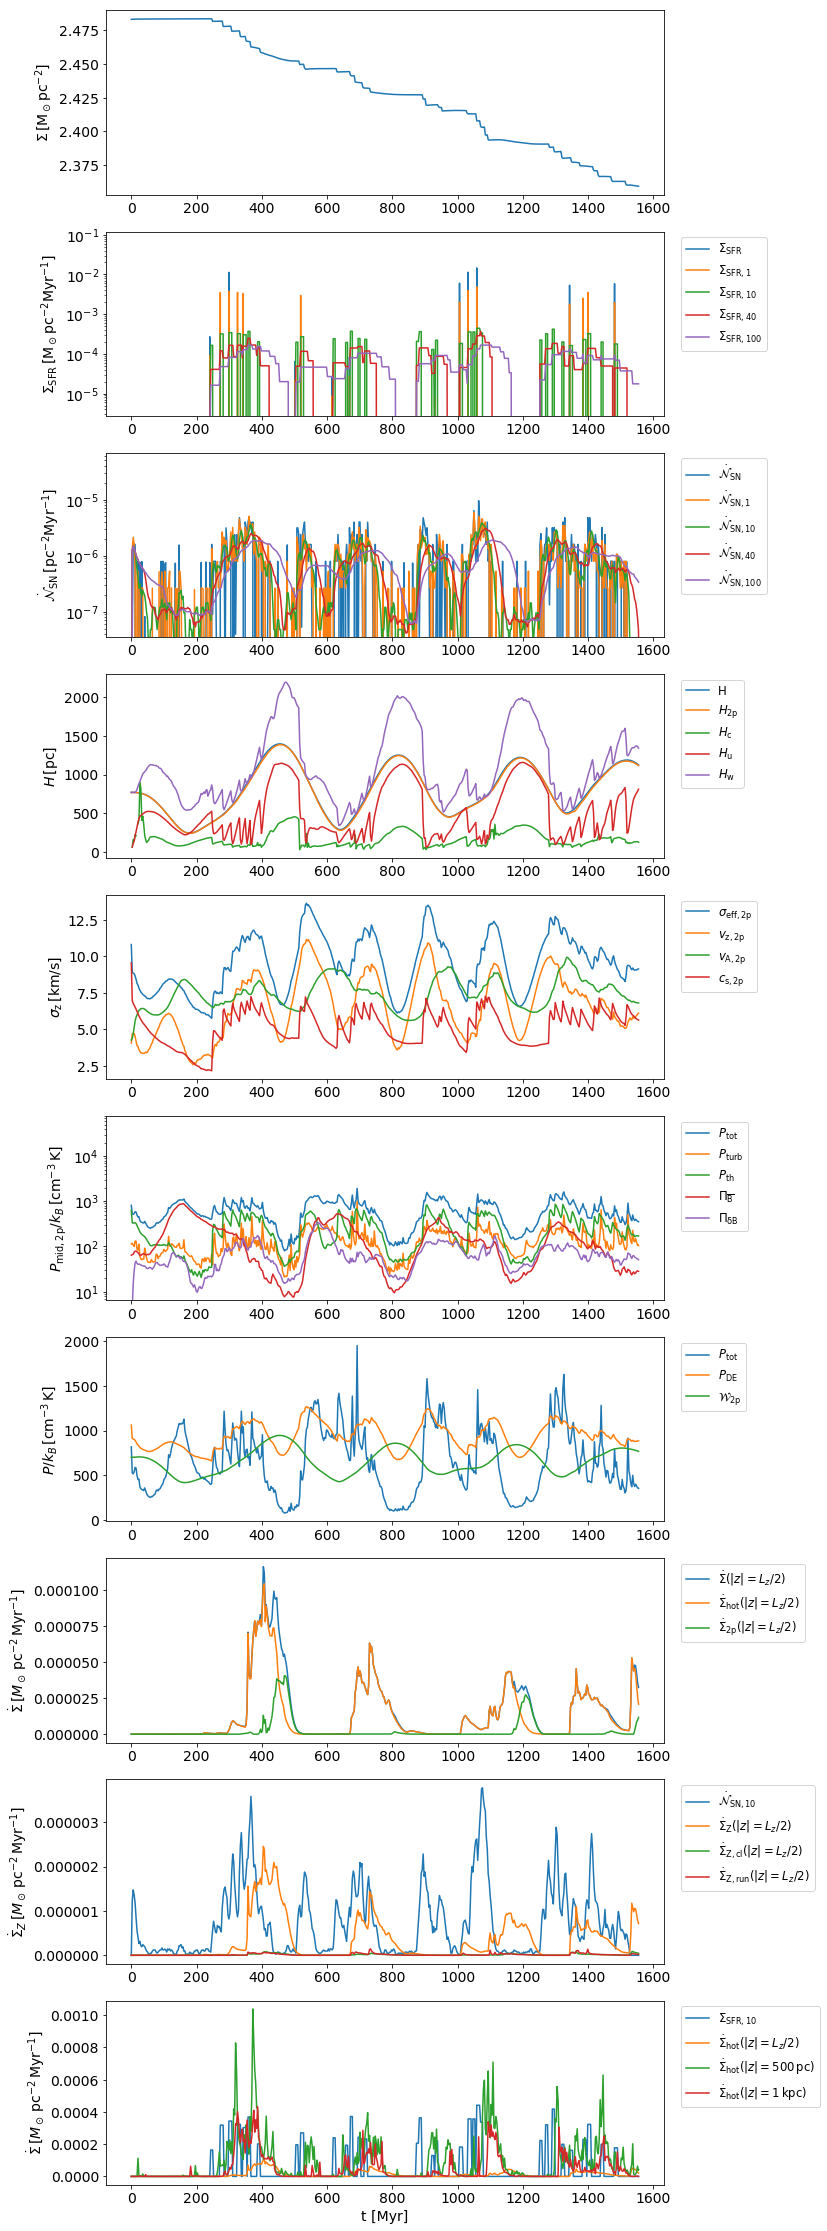

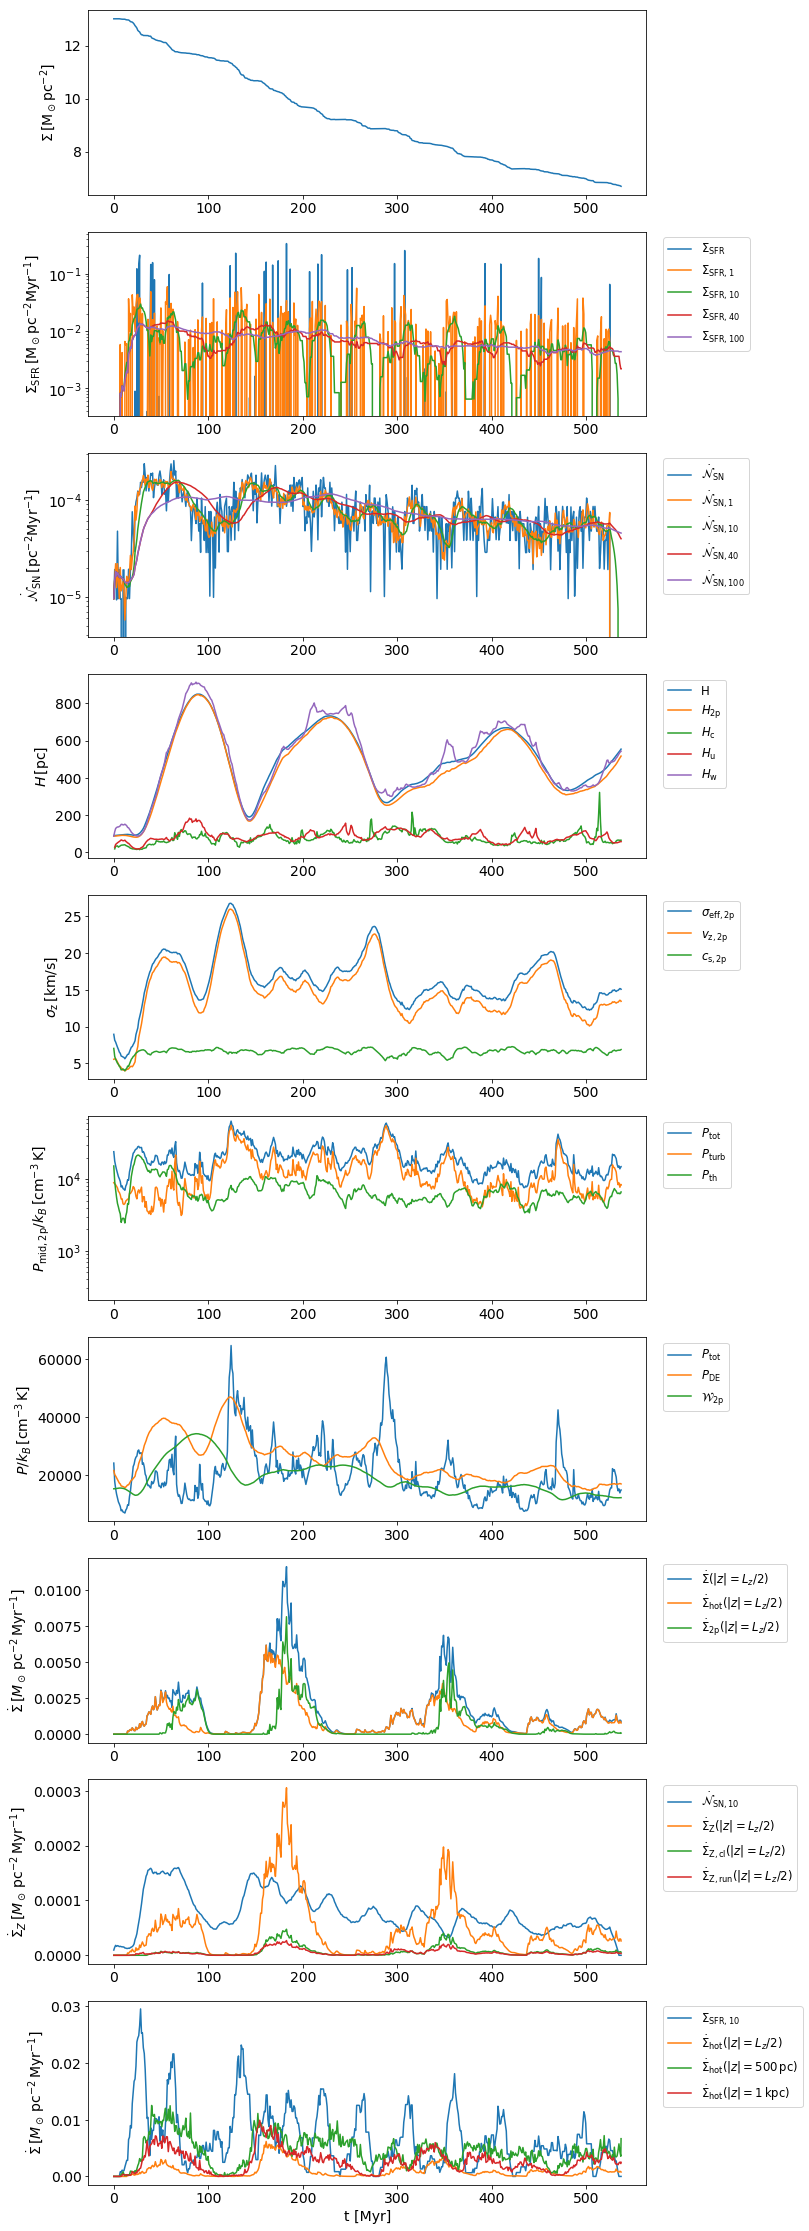

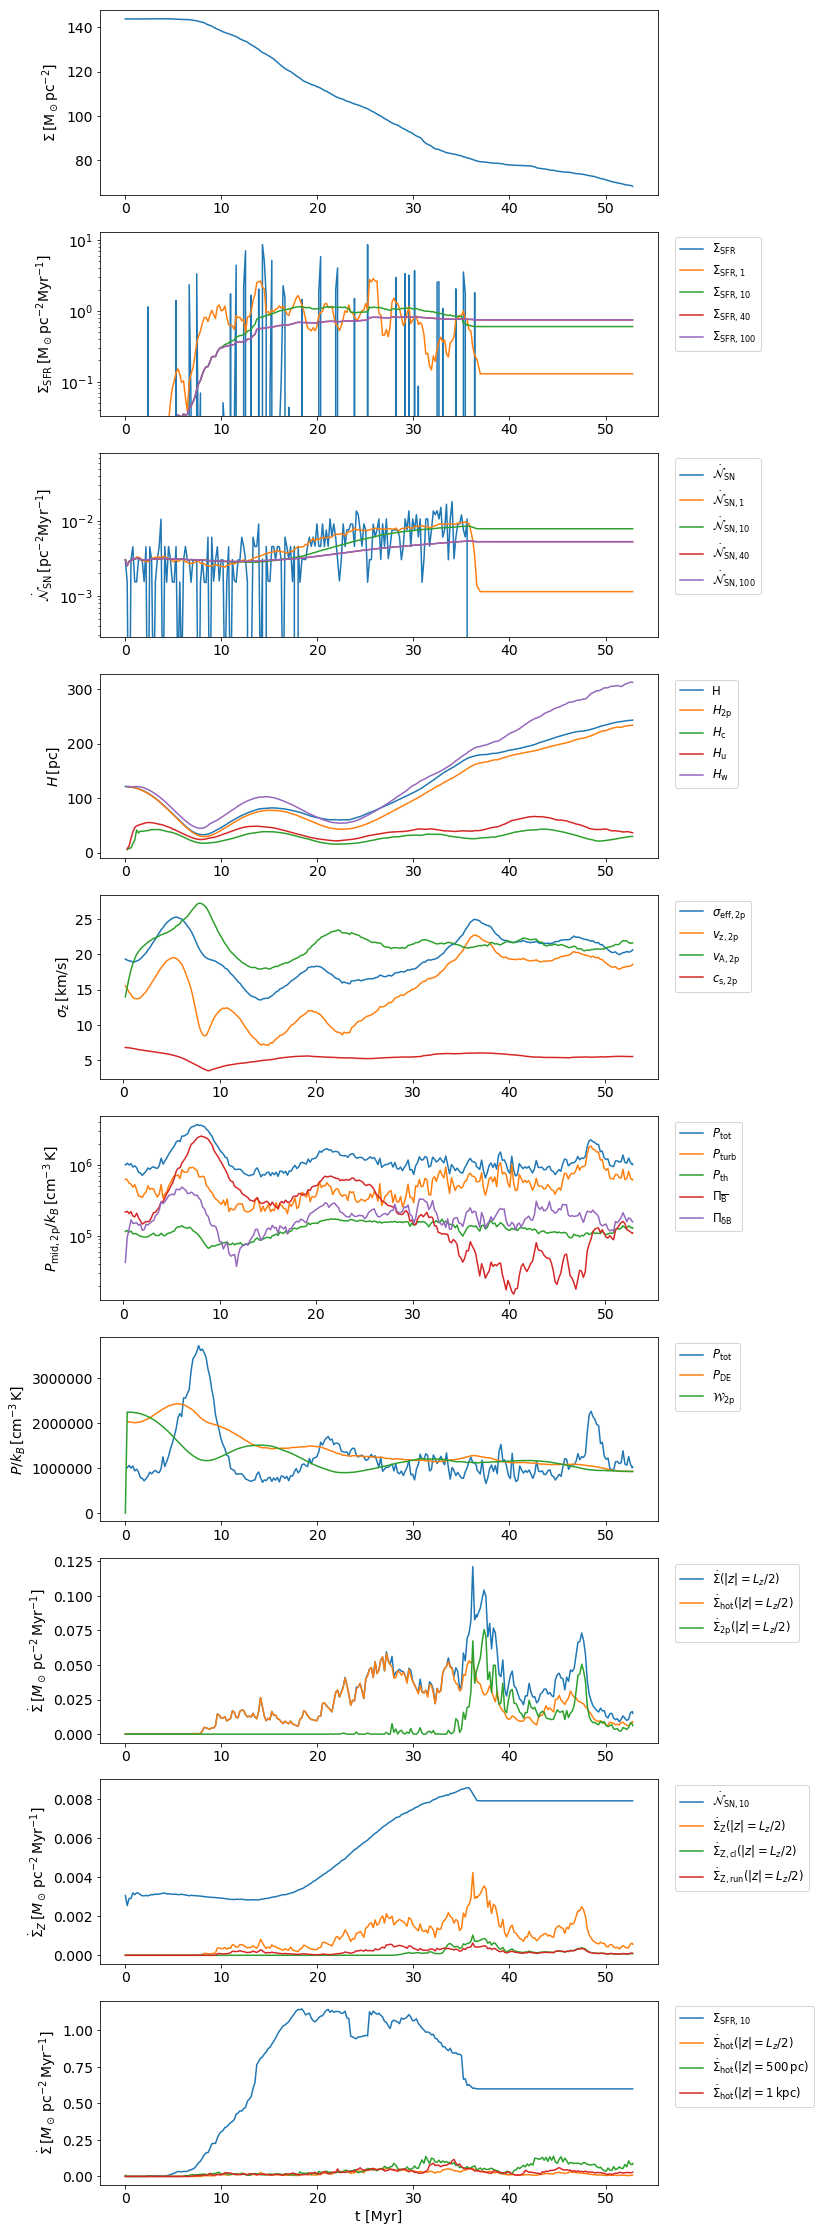

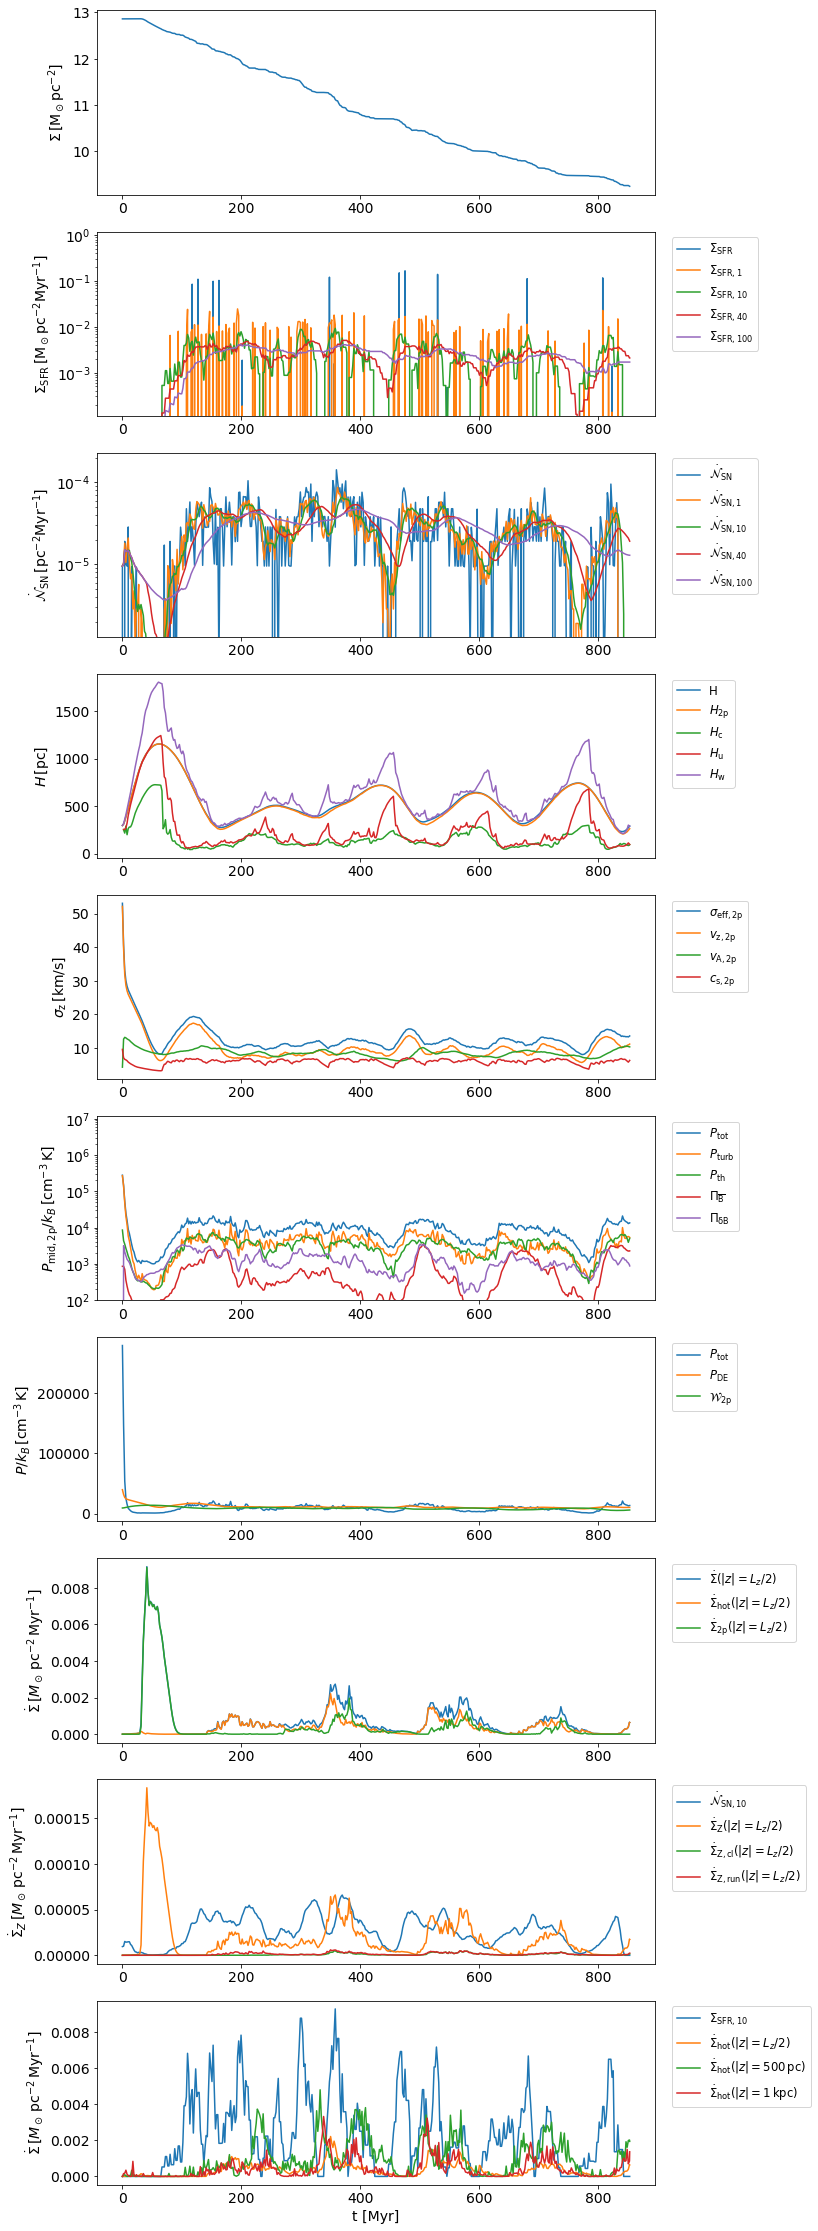

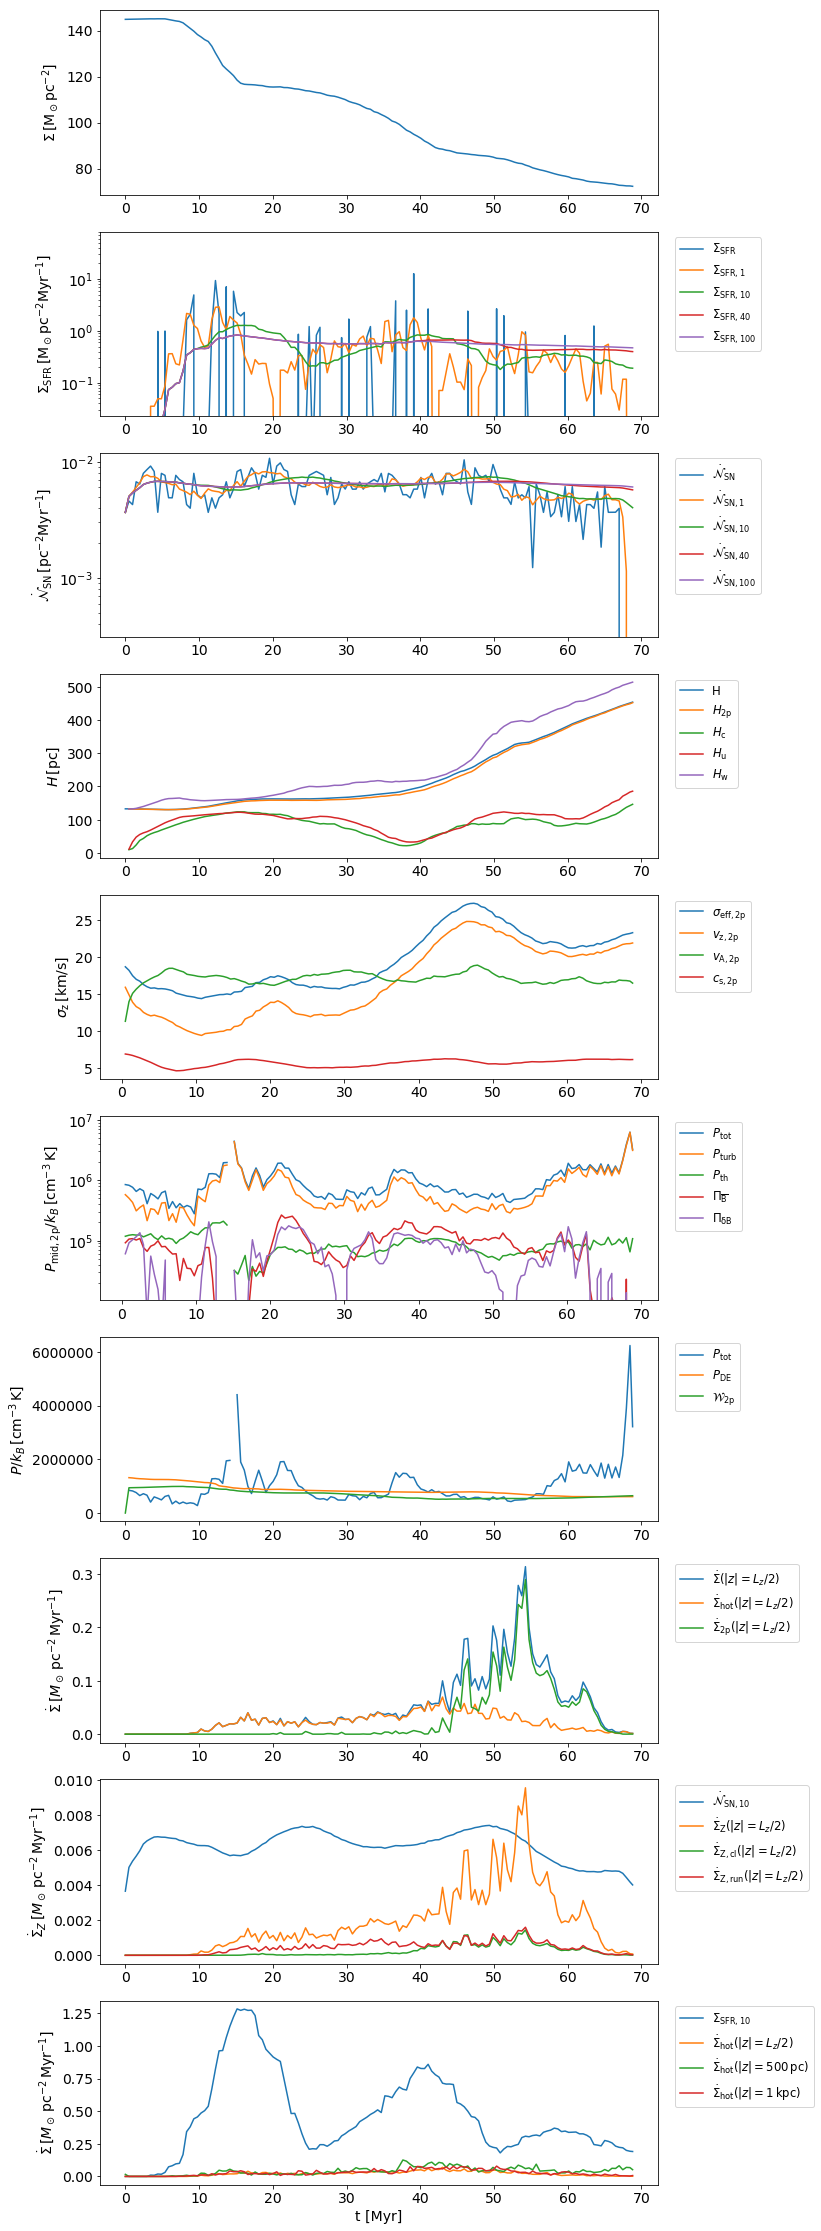

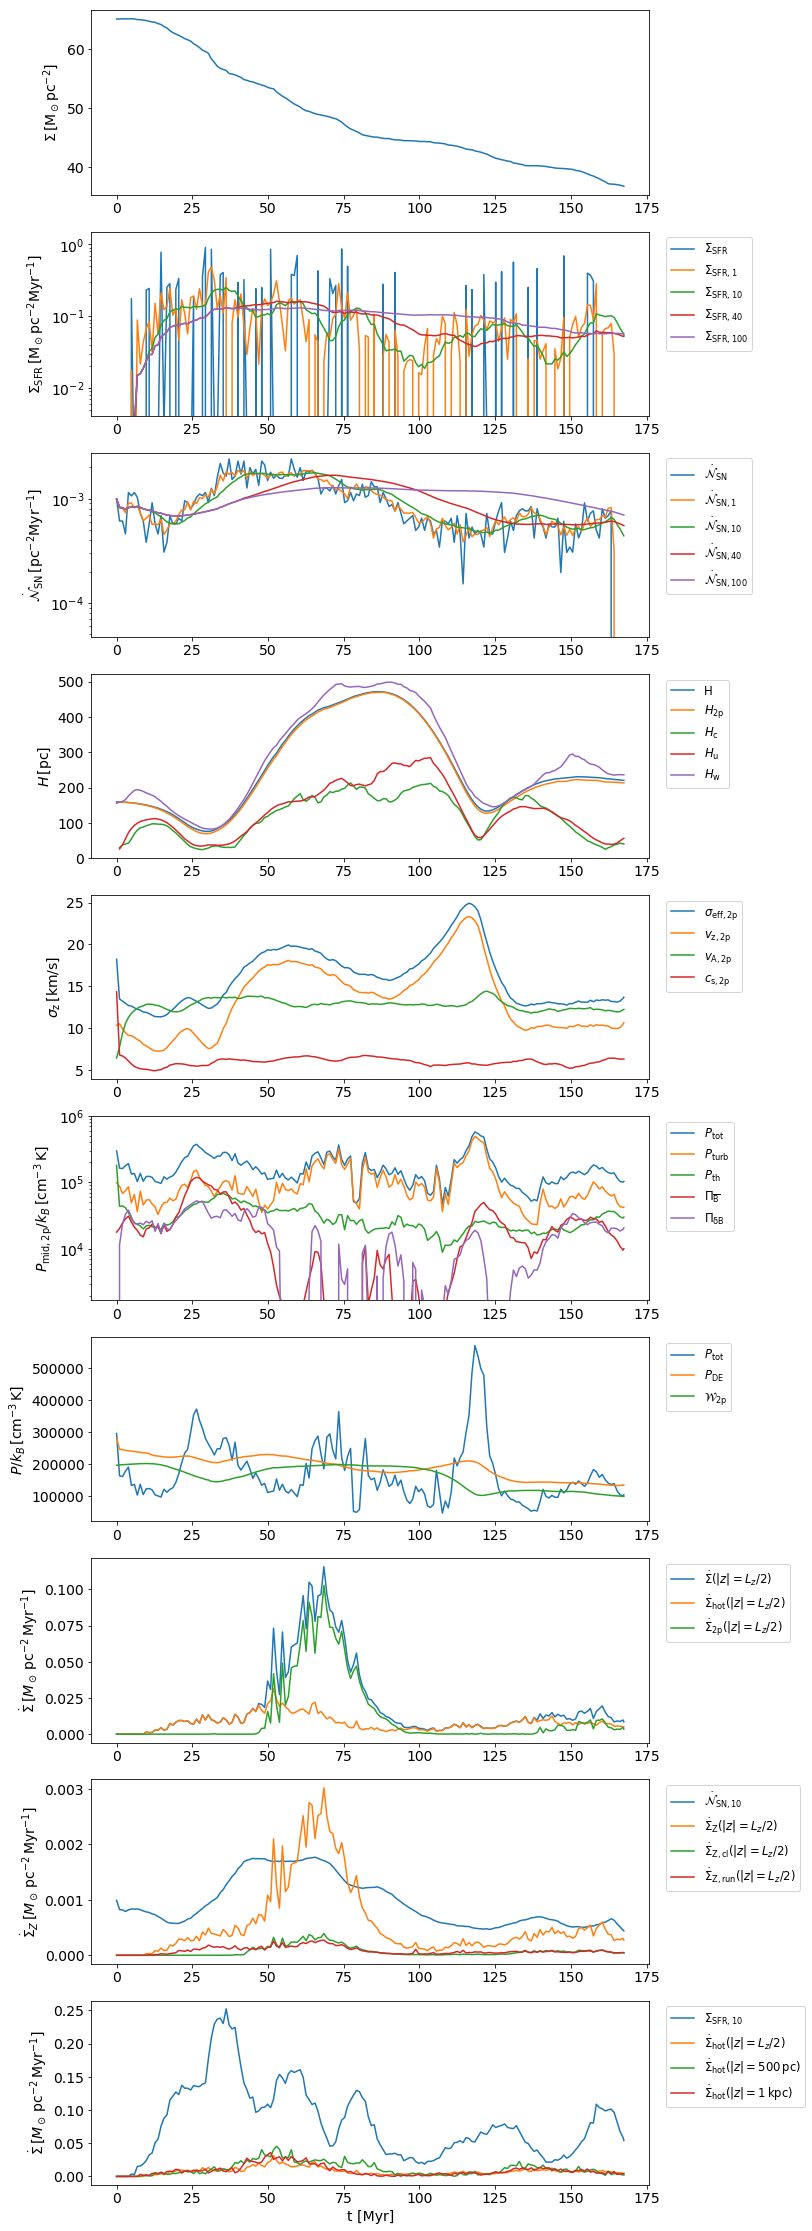

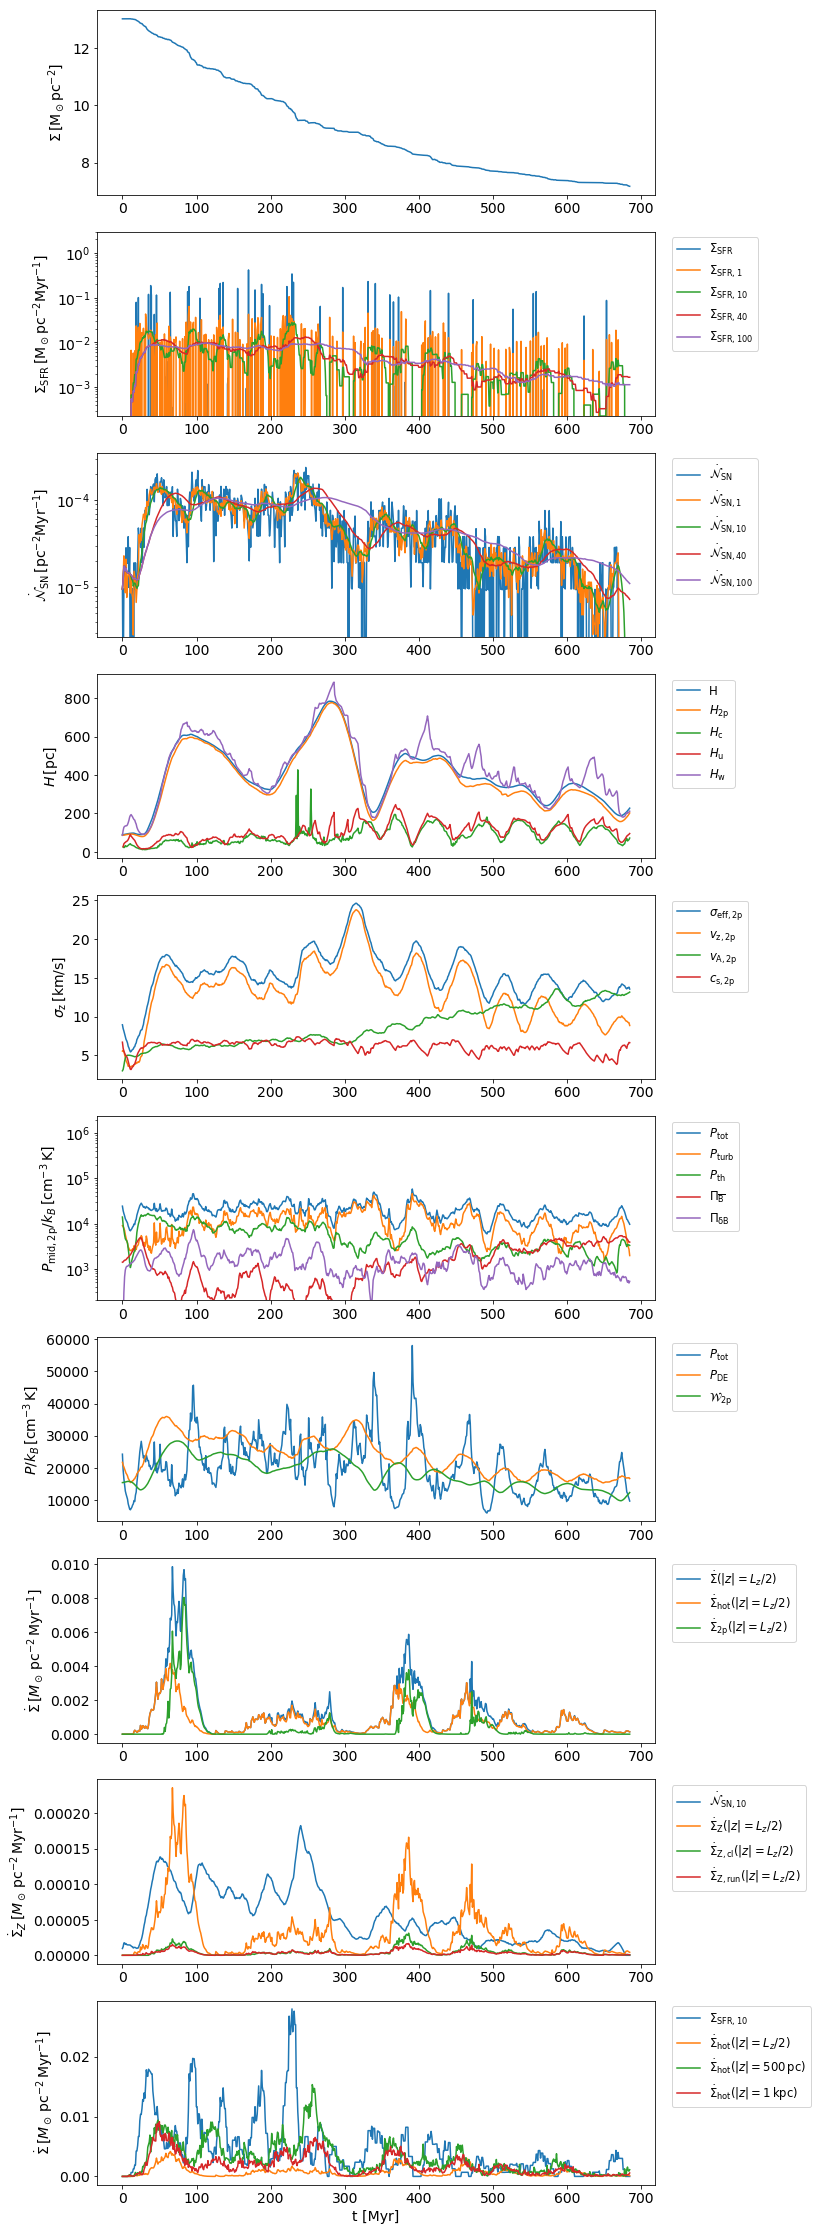

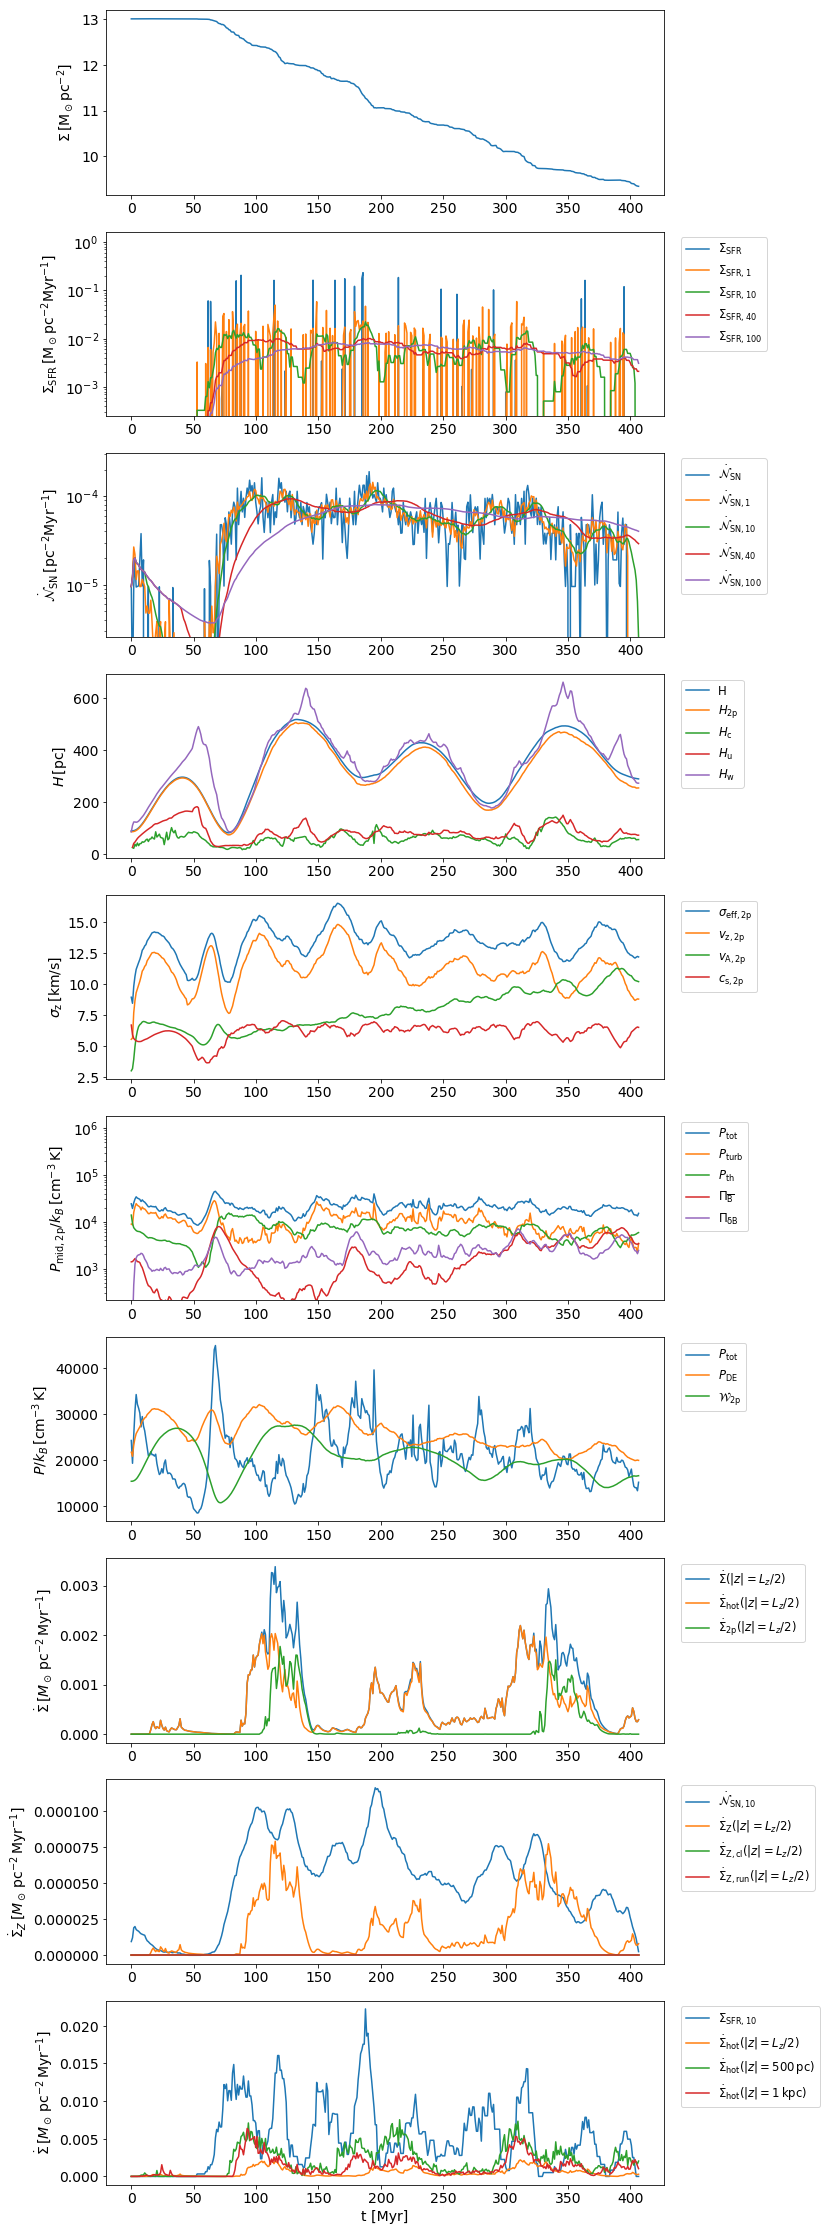

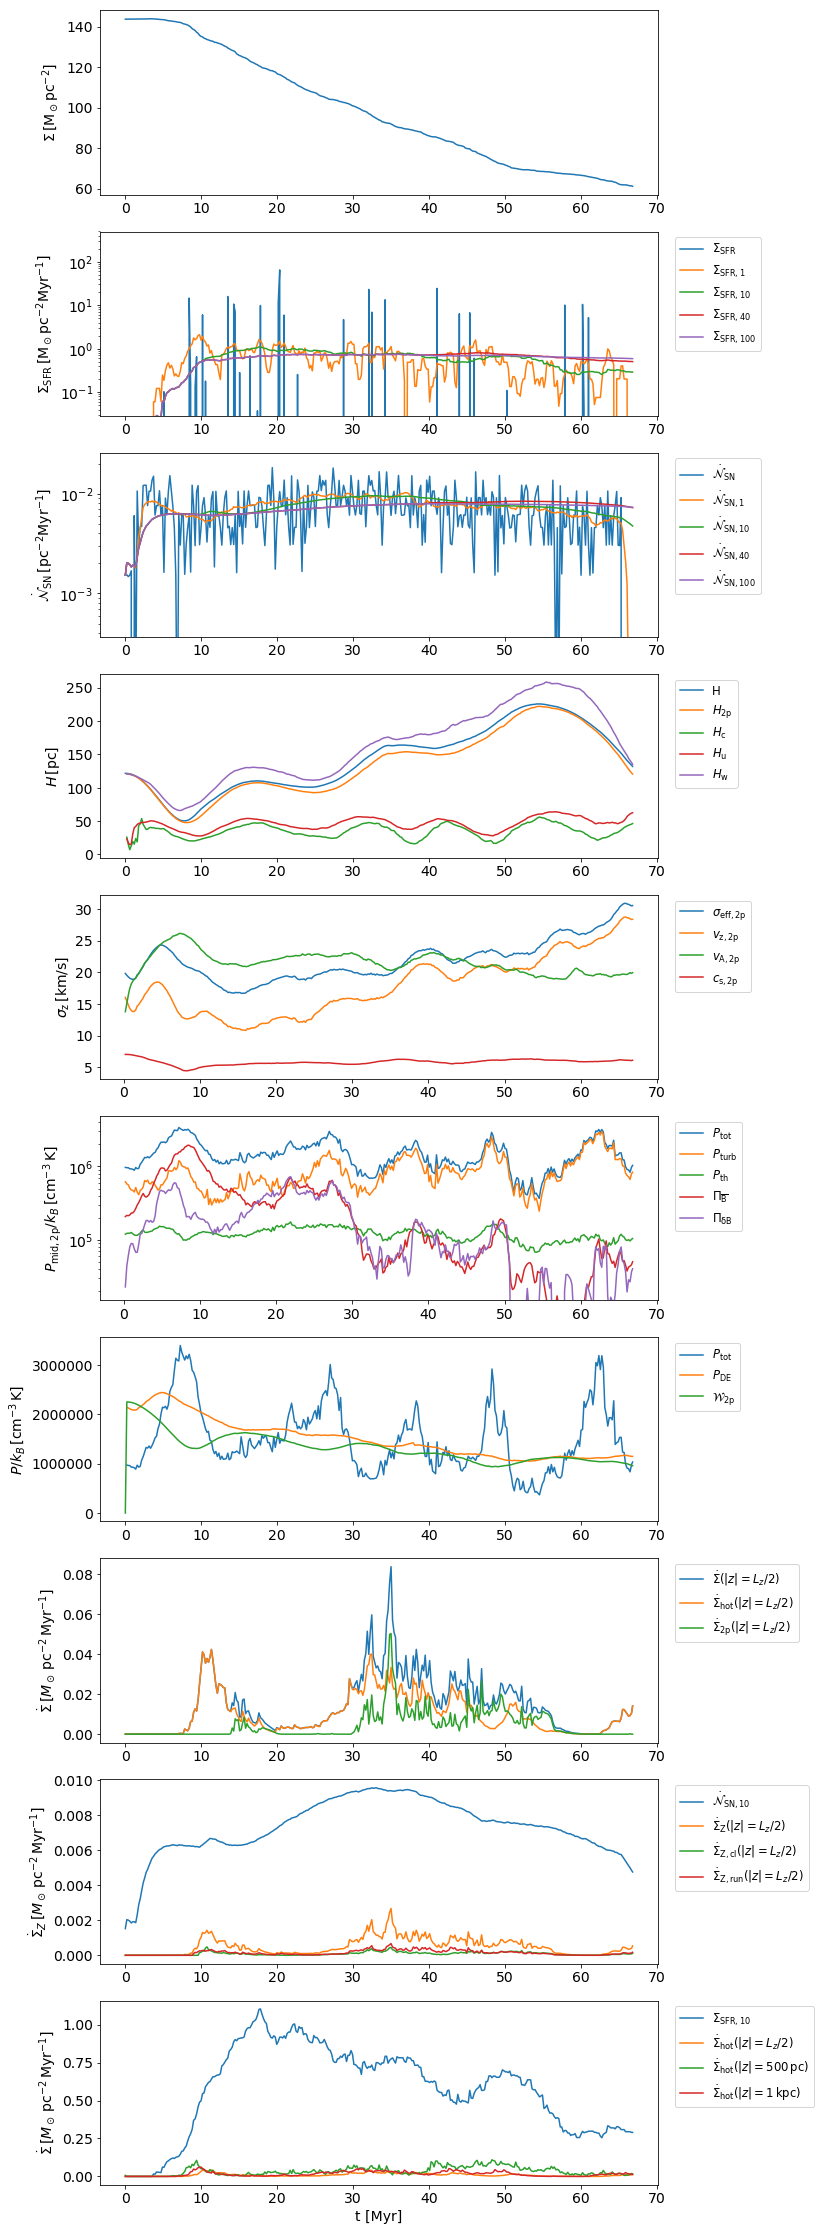

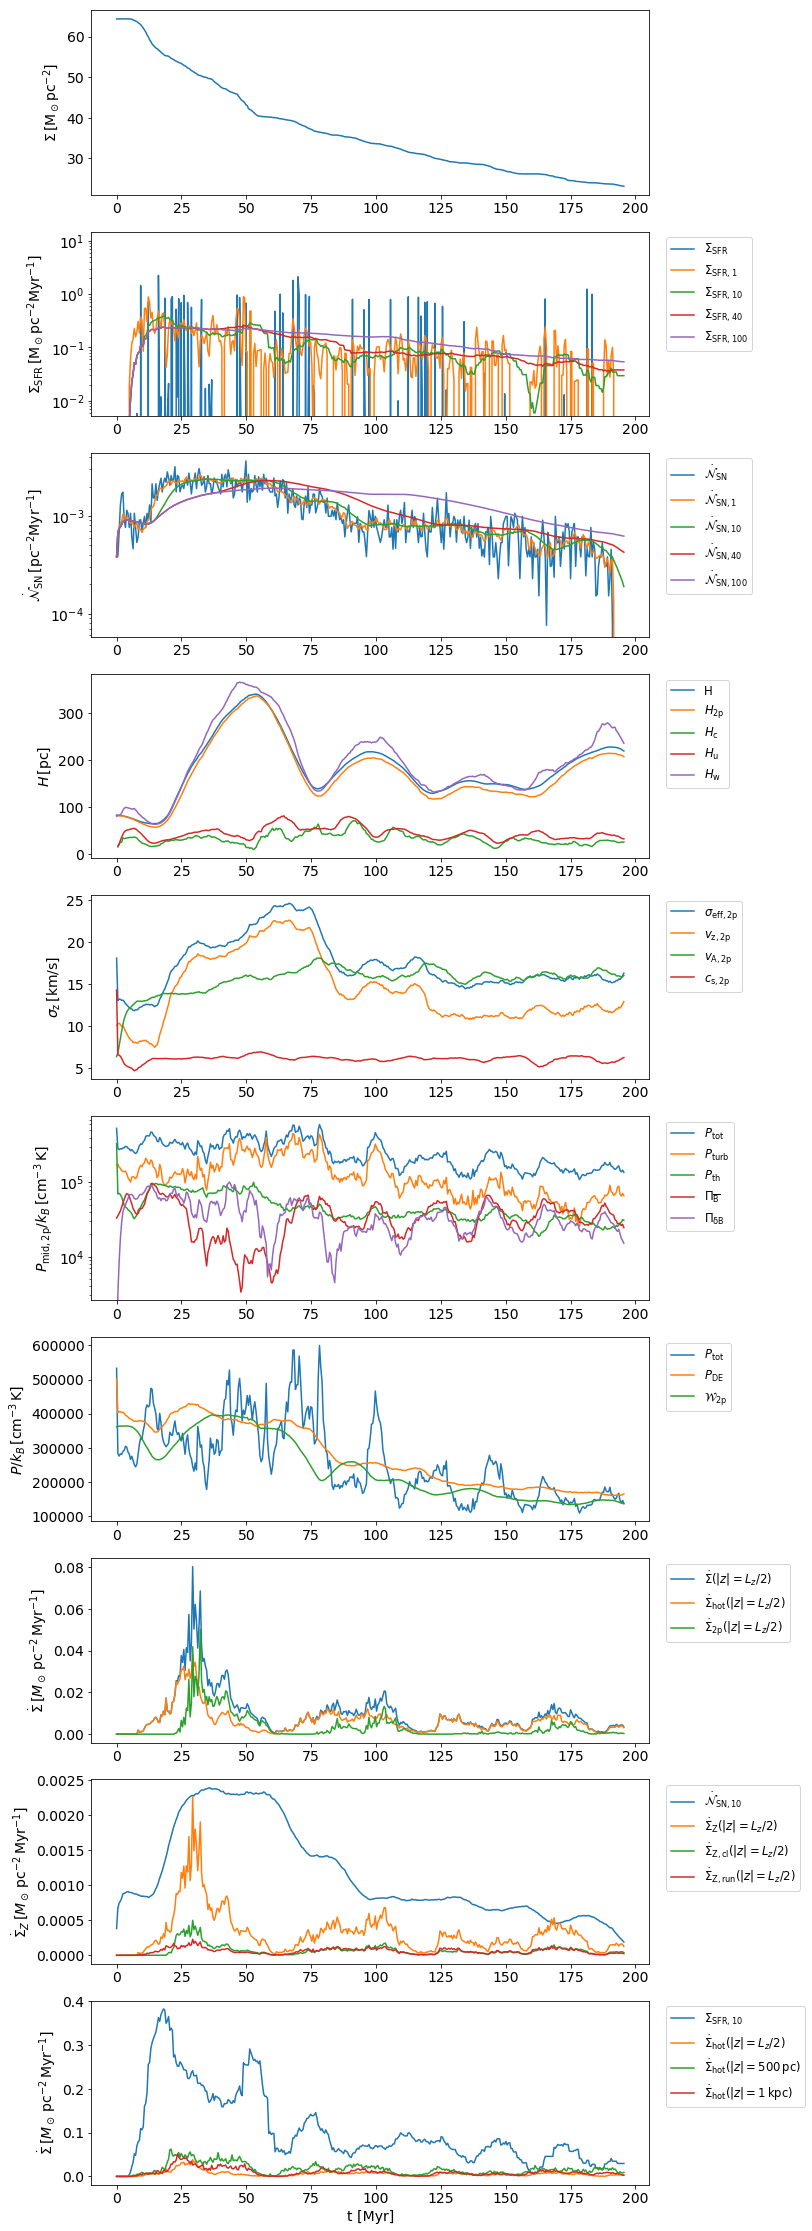

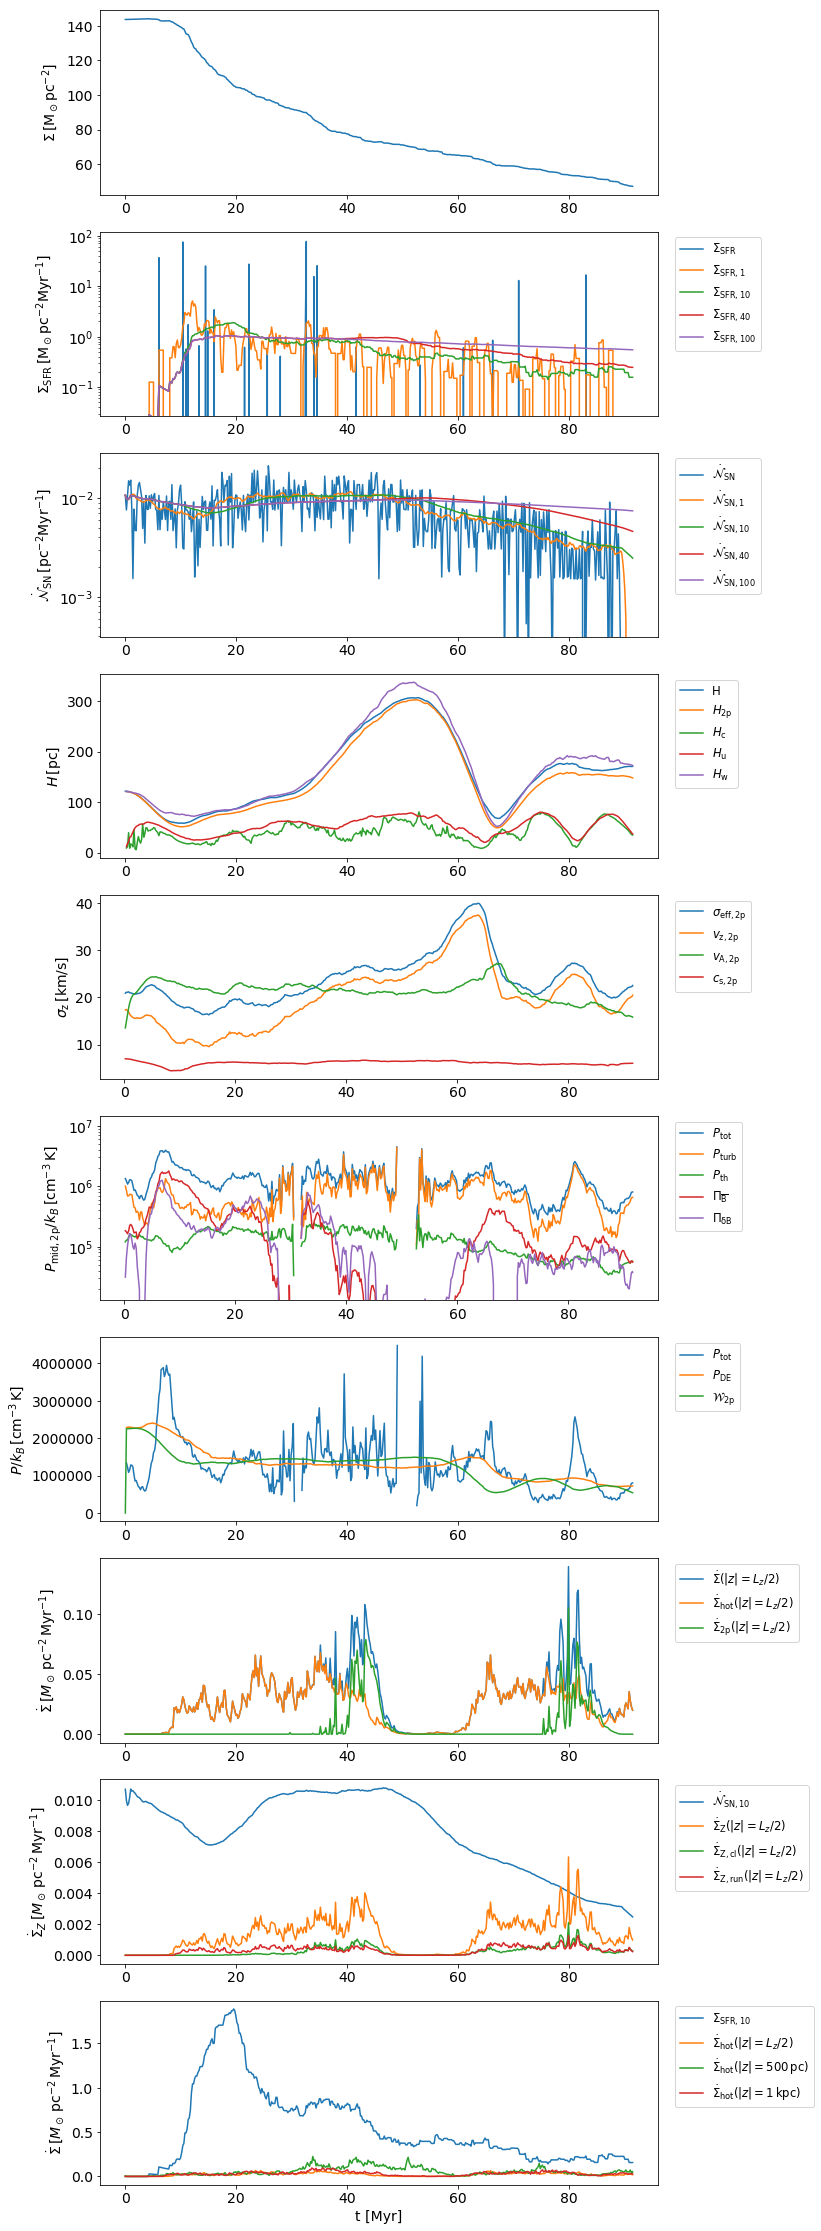

In [33]:
for problem_id in ids: 
    preprocessing.doall(base,problem_id,do_yt=False)
    h_zp=pd.read_pickle('{}{}/hst/{}.hst_zp.p'.format(base,problem_id,problem_id))
    sfrmean=h_zp['sfr10'].mean()
    snrmean=h_zp['snr10'].mean()
    Pmidmean=h_zp['Pmid_2p'].mean()
    metadata=[
            ('surf',labels['surf']+label_units['surf'],'linear',[],None,None),
            ('sfr',labels['sfr']+label_units['sfr'],'log',['sfr1','sfr10','sfr40','sfr100'],sfrmean*0.05,None),
            ('snr',labels['snr']+label_units['snr'],'log',['snr1','snr10','snr40','snr100'],snrmean*0.05,None),
            ('H',labels['scaleH']+label_units['scaleH'],'linear',['H_2p','H_c','H_u','H_w'],None,None),
            ('sigma_eff_2p',labels['sigma_z']+label_units['velocity'],'linear',['v3_2p','vA_2p','cs_2p'],None,None),
            ('Pmid_2p',labels['pressure_mid_2p']+label_units['pressure'],'log',
             ['Pturb_mid_2p','Pth_mid_2p','Pimag_mean_mid_2p','Pimag_turb_mid_2p'],Pmidmean*0.01,None),
            ('Pmid_2p',labels['pressure']+label_units['pressure'],'linear',['PDE2','W_2p'],None,None),
            ('massflux_bd_d',labels['massflux']+label_units['massflux'],'linear',
             ['massflux_bd_d_h','massflux_bd_d_2p'],None,None),
            ('snr10',labels['metalflux']+label_units['massflux'],'linear',
             ['massflux_bd_s1','massflux_bd_s2','massflux_bd_s3'],None,None),
            ('sfr10',labels['massflux']+label_units['massflux'],'linear',
             ['massflux_bd_d_h','massflux_out_5_h','massflux_out_10_h'],None,None),
             ]
    figdir='{}{}/figures/'.format(base,problem_id)
    if not os.path.isdir(figdir): os.mkdir(figdir)
    figdir_tigress='{}/public_html/TIGRESS_figures/{}'.format(base,problem_id)
    if not os.path.isdir(figdir_tigress):
        print('creating hardlink for {} at {}'.figdir,figdir_tigress)
        os.link(figdir,figdir_tigress)
    preprocessing.draw_history(h_zp,metadata,figfname='{}{}/figures/{}-history.png'.format(base,problem_id,problem_id))
#    draw_history(h_zp,metadata2,figfname='{}{}/figures/{}-history2.png'.format(base,problem_id,problem_id))